<a href="https://colab.research.google.com/github/CarlChalmers/ChessAI/blob/main/ChessAI_55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install python-chess

In [ ]:
import chess
import chess.engine
import random
import numpy

def generateRandomBoard():
    board = chess.Board()
    depth = random.randrange(0,100)

    for _ in range(depth):
        moves = list(board.legal_moves)
        randomMove = random.choice(moves)
        board.push(randomMove)
        if board.is_game_over():
            break
    return board



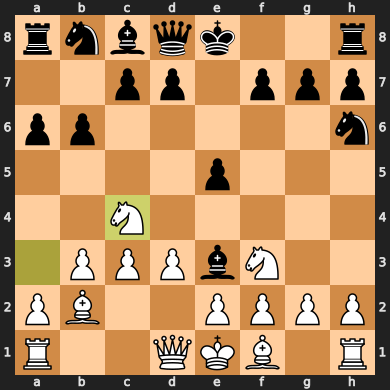

In [ ]:
board = generateRandomBoard()
board

In [ ]:


def stockfish(board,depth):
  with chess.engine.SimpleEngine.popen_uci('/content/stockfish') as sf:
    result = sf.analyse(board,chess.engine.Limit(depth=depth))
    score = result['score'].white().score()
    return score

In [ ]:
squaresIndex = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'e': 4,
    'f': 5,
    'g': 6,
    'h': 7
}

def squareToIndex(square):
  letter = chess.square_name(square)
  return 8 - int(letter[1]), squaresIndex[letter[0]]

# print(squareToIndex(chess.H3))
def splitDims(board):
  board3d = numpy.zeros((14,8,8),dtype=numpy.int8)

  for piece in chess.PIECE_TYPES:
    for square in board.pieces(piece, chess.WHITE):
      idx = numpy.unravel_index(square,(8,8))
      board3d[piece-1][7-idx[0]][idx[1]] = 1
    for square in board.pieces(piece, chess.BLACK):
      idx = numpy.unravel_index(square,(8,8))
      board3d[piece+5][7-idx[0]][idx[1]] = 1

  aux = board.turn
  board.turn = chess.WHITE
  for move in board.legal_moves:
    i,j = squareToIndex(move.to_square)
    board3d[12][i][j] = 1
  board.turn = chess.BLACK
  for move in board.legal_moves:
    i,j = squareToIndex(move.to_square)
    board3d[13][i][j] = 1
  board.turn = aux
  return board3d







In [ ]:
splitDims(board)

array([[[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        

TensorFlow Time

In [ ]:
#!pip install tensorflow
#!pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
import keras.models as models
import keras.utils as utils
import keras.layers as layers
import keras.optimizers as optimizers

def buildModel(convSize,convDepth):
  board3d = layers.Input(shape=(14,8,8))
  x = board3d
  for _ in range(convDepth):
    x = layers.Conv2D(filters=convSize,kernel_size=3,padding='same')(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64,'relu')(x)
  x = layers.Dense(1,'sigmoid')(x)
  return models.Model(inputs=board3d,outputs=x)




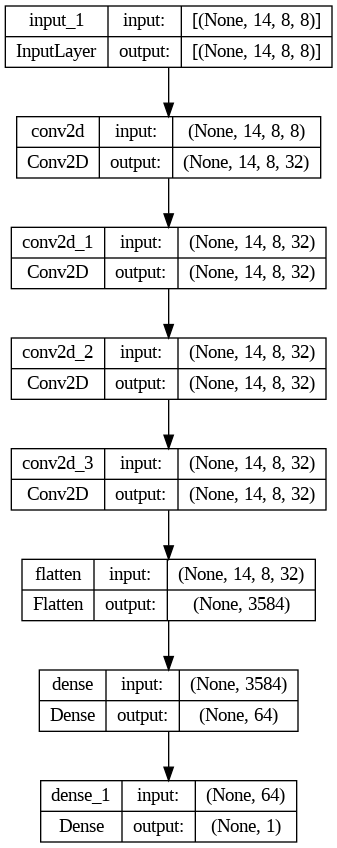

In [ ]:
model = buildModel(32,4)
utils.plot_model(model,to_file='modelPlot.png',show_shapes=True,show_layer_names=True)


In [ ]:
import pandas as pd
import numpy as np

# Load your csv data
data = pd.read_csv('games.csv')

# Convert the DataFrame to a numpy array
numpy_array = data.to_numpy()

# Save the numpy array as an npz file
np.savez('dataset.npz', numpy_array=numpy_array)

In [ ]:
npz_file_path = 'new_dataset.npz'

# Load the NPZ file
data = np.load(npz_file_path)

x_train = data['x_train']
y_train = data['y_train']

# Assuming the data is organized as (number of samples, height, width, channels)
# and 'y_train' contains the evaluations
index_to_inspect = 0  # Change this index if you want to inspect a different board

# Print the chess board (x_train) and its evaluation (y_train) for the specified index
# print("Chess Board:")
# print(x_train[index_to_inspect])

# print("\nEvaluation:")
# print(y_train[index_to_inspect])


Chess Board:
[[[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0]]

 [[0 0 0 0 0 0 

In [ ]:
import keras.callbacks as callbacks

def get_dataset():
  container = numpy.load('new_dataset.npz')
  b,v = container['x_train'],container['y_train']
  return b,v

x_train,y_train = get_dataset()
print(x_train.shape)
print(y_train.shape)







(1000000, 14, 8, 8)
(1000000,)


In [ ]:
model.compile(optimizer=optimizers.Adam(5e-4),loss='mean_squared_error')
model.summary()
model.fit(x_train,y_train,
          batch_size=2048*2,
          epochs=100,
          verbose='on',
          validation_split=0.1,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss',patience=10),
                     callbacks.EarlyStopping(monitor='loss',patience=15,min_delta=1)]
          )
model.save('model.h5')






Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 8, 8)]        0         
                                                                 
 conv2d (Conv2D)             (None, 14, 8, 32)         2336      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 8, 32)         9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 8, 32)         9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 8, 32)         9248      
                                                                 
 flatten (Flatten)           (None, 3584)              0         
                                                                 
 dense (Dense)               (None, 64)                229440